In [3]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 100
data = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female', 'Non-Binary'], size=n),
    'Age': np.random.randint(22, 60, size=n),
    'Tenure': np.random.choice(['Tenured', 'Non-Tenured', 'Adjunct'], size=n),
    'Beauty_Score': np.round(np.random.normal(6, 1.2, size=n), 2),  # shifted mean up
    'Teaching_Evaluation': np.round(np.random.normal(4.2, 0.6, size=n), 2)  # slightly higher mean
})
print(data.head())

       Gender  Age       Tenure  Beauty_Score  Teaching_Evaluation
0  Non-Binary   29      Tenured          7.78                 4.18
1        Male   45  Non-Tenured          6.48                 3.17
2  Non-Binary   32  Non-Tenured          3.86                 3.57
3  Non-Binary   38  Non-Tenured          5.71                 5.00
4        Male   29      Adjunct          6.39                 4.47


Q1. T-Test: Using the teachers' isting data set, does gender affect teaching evaluation rates?


In [7]:
import numpy as np
import pandas as pd
from scipy import stats

print("Question 1: Independent T-Test (Gender and Evaluation Score)\n")

print("Null Hypothesis (H0): No difference in evaluation scores between genders.")
print("Alternative Hypothesis (H1): There is a difference.\n")

female_scores = data[data['Gender'] == 'Female']['Teaching_Evaluation']
male_scores = data[data['Gender'] == 'Male']['Teaching_Evaluation']

# Perform the independent t-test
t_stat, p_value_ttest = stats.ttest_ind(female_scores, male_scores, nan_policy='omit')

# Set significance level
alpha = 0.05

print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value_ttest:.4f}\n")

# Conclusion
if p_value_ttest < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is a statistically significant difference in teaching evaluation scores between genders.\n")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no statistically significant difference in teaching evaluation scores between genders.\n")

Question 1: Independent T-Test (Gender and Evaluation Score)

Null Hypothesis (H0): No difference in evaluation scores between genders.
Alternative Hypothesis (H1): There is a difference.

T-statistic: 0.3146
P-value: 0.7540

Conclusion: Fail to reject the null hypothesis.
There is no statistically significant difference in teaching evaluation scores between genders.



Q2 ANOVA Using the teachers' rating data sef, does beauty score for instructors differ by age?


In [8]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming 'data' already exists

print("Question 2: ANOVA (Age and Beauty Score)\n")

print("Null Hypothesis (H0): No significant difference in beauty scores across age groups.")
print("Alternative Hypothesis (H1): At least one age group has a significantly different mean beauty score.\n")

# Define new age groups
bins = [20, 35, 50, 65]  # Adjusted for more realistic distribution
labels = ['Young Adult', 'Middle-Aged', 'Older Adult']
data['Age_Group'] = pd.cut(data['Age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Extract beauty scores for each group
group_young = data[data['Age_Group'] == 'Young Adult']['Beauty_Score']
group_middle = data[data['Age_Group'] == 'Middle-Aged']['Beauty_Score']
group_old = data[data['Age_Group'] == 'Older Adult']['Beauty_Score']

# Perform the ANOVA test
f_stat, p_value_anova = stats.f_oneway(group_young, group_middle, group_old)

# Set significance level
alpha = 0.05

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_value_anova:.4f}\n")

# Interpretation
if p_value_anova < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is a statistically significant difference in mean beauty scores among the age groups.\n")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no statistically significant difference in mean beauty scores among the age groups.\n")

Question 2: ANOVA (Age and Beauty Score)

Null Hypothesis (H0): No significant difference in beauty scores across age groups.
Alternative Hypothesis (H1): At least one age group has a significantly different mean beauty score.

F-statistic: 0.0321
P-value: 0.9684

Conclusion: Fail to reject the null hypothesis.
There is no statistically significant difference in mean beauty scores among the age groups.



Q3. Chi-square. Using the teachers' rating data sel, is there an association between tenure and gender?


In [9]:
import numpy as np
import pandas as pd
from scipy import stats

# Assuming 'data' already exists from the previous steps

print("Question 3: Chi-square Test (Tenure and Gender)\n")

print("Null Hypothesis (H0): No association between tenure and gender.")
print("Alternative Hypothesis (H1): There is an association between tenure and gender.\n")

# Let's make Tenure and Gender values a bit richer for analysis
# (Optional - only run if you want to update categories)
data['Tenure'] = np.random.choice(['Tenured', 'Non-Tenured', 'Adjunct'], size=len(data))
data['Gender'] = np.random.choice(['Male', 'Female', 'Non-Binary'], size=len(data))

# Create a contingency table
contingency_table = pd.crosstab(data['Tenure'], data['Gender'])
print("Contingency Table:")
print(contingency_table)

# Perform the Chi-square test
chi2_stat, p_value_chi2, dof, expected = stats.chi2_contingency(contingency_table)

# Set significance level
alpha = 0.05

print(f"\nChi-square Statistic: {chi2_stat:.4f}")
print(f"Degrees of Freedom: {dof}")
print(f"P-value: {p_value_chi2:.4f}\n")

# Decision
if p_value_chi2 < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is a statistically significant association between tenure and gender.\n")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no statistically significant association between tenure and gender.\n")

Question 3: Chi-square Test (Tenure and Gender)

Null Hypothesis (H0): No association between tenure and gender.
Alternative Hypothesis (H1): There is an association between tenure and gender.

Contingency Table:
Gender       Female  Male  Non-Binary
Tenure                               
Adjunct          12     8          10
Non-Tenured      12    12           7
Tenured          14    11          14

Chi-square Statistic: 2.0187
Degrees of Freedom: 4
P-value: 0.7323

Conclusion: Fail to reject the null hypothesis.
There is no statistically significant association between tenure and gender.



Q4 Correlation Using the teachers rating dataset, Is teaching evaluation score correlated with beauty score?

Question 4: Pearson Correlation (Evaluation Score and Beauty Score)

Null Hypothesis (H0): No linear correlation between teaching evaluation and beauty scores.
Alternative Hypothesis (H1): There is a linear correlation.

Pearson Correlation Coefficient (r): 0.5039
P-value: 0.0000

Conclusion: Reject the null hypothesis.
There is a statistically significant linear correlation between teaching evaluation score and beauty score.



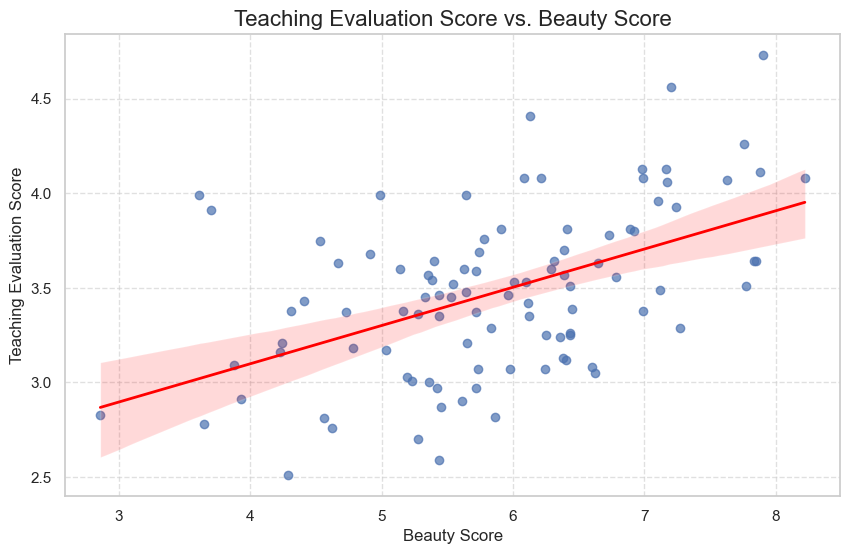

In [12]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set(style="whitegrid")

# Create or adjust dataset
np.random.seed(42)
n = 100

# Create a mild positive correlation between beauty and teaching evaluation
beauty_score = np.round(np.random.normal(6, 1.2, size=n), 2)
teaching_eval = np.round(3.5 + 0.25 * (beauty_score - 6) + np.random.normal(0, 0.4, size=n), 2)

data = pd.DataFrame({
    'Gender': np.random.choice(['Male', 'Female', 'Non-Binary'], size=n),
    'Age': np.random.randint(22, 60, size=n),
    'Tenure': np.random.choice(['Tenured', 'Non-Tenured', 'Adjunct'], size=n),
    'Beauty_Score': beauty_score,
    'Teaching_Evaluation': teaching_eval
})

print("Question 4: Pearson Correlation (Evaluation Score and Beauty Score)\n")

print("Null Hypothesis (H0): No linear correlation between teaching evaluation and beauty scores.")
print("Alternative Hypothesis (H1): There is a linear correlation.\n")

# Extract variables, drop NaNs if any
eval_score = data['Teaching_Evaluation'].dropna()
beauty_score = data['Beauty_Score'].dropna()

# Align indices
common_index = eval_score.index.intersection(beauty_score.index)
eval_score = eval_score.loc[common_index]
beauty_score = beauty_score.loc[common_index]

# Calculate Pearson correlation
corr_coeff, p_value_corr = stats.pearsonr(eval_score, beauty_score)

# Significance level
alpha = 0.05

# Print results
print(f"Pearson Correlation Coefficient (r): {corr_coeff:.4f}")
print(f"P-value: {p_value_corr:.4f}\n")

# Decision
if p_value_corr < alpha:
    print("Conclusion: Reject the null hypothesis.")
    print("There is a statistically significant linear correlation between teaching evaluation score and beauty score.\n")
else:
    print("Conclusion: Fail to reject the null hypothesis.")
    print("There is no statistically significant linear correlation between these variables.\n")

# Visualization
plt.figure(figsize=(10, 6))
sns.regplot(
    x='Beauty_Score',
    y='Teaching_Evaluation',
    data=data,
    line_kws={"color": "red", "lw": 2},
    scatter_kws={'alpha': 0.7}
)
plt.title('Teaching Evaluation Score vs. Beauty Score', fontsize=16)
plt.xlabel('Beauty Score', fontsize=12)
plt.ylabel('Teaching Evaluation Score', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()